In [1]:
#Mini Project 2: Predicting Customer Churn at a Bank Using Machine Learning
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Set plot style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Step 2: Load and Inspect the Data

print("--- Loading and Inspecting Data ---")
df = pd.read_csv('/Users/yangfeng/Desktop/bootcamp/Lab 6/mini project 2/bank_customer_churn.csv')
print("Dataset loaded successfully.")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())


--- Loading and Inspecting Data ---
Dataset loaded successfully.
First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1     


--- Exploratory Data Analysis ---


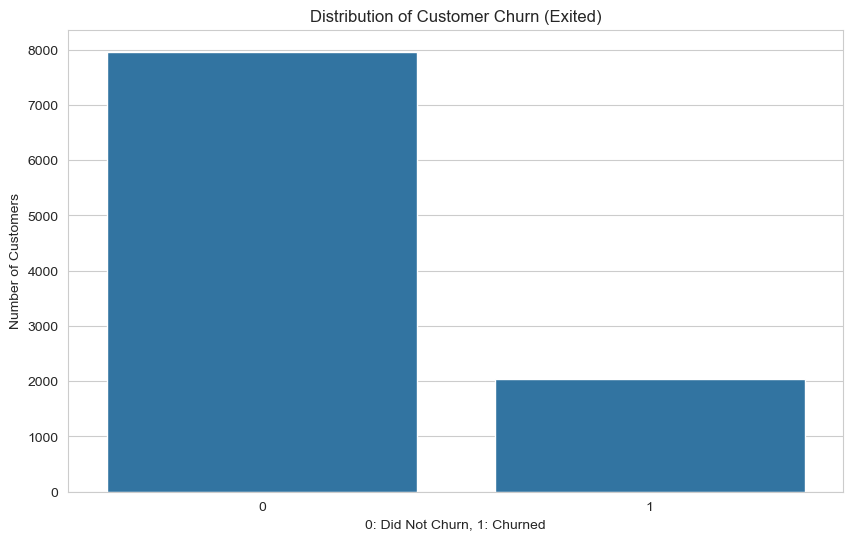

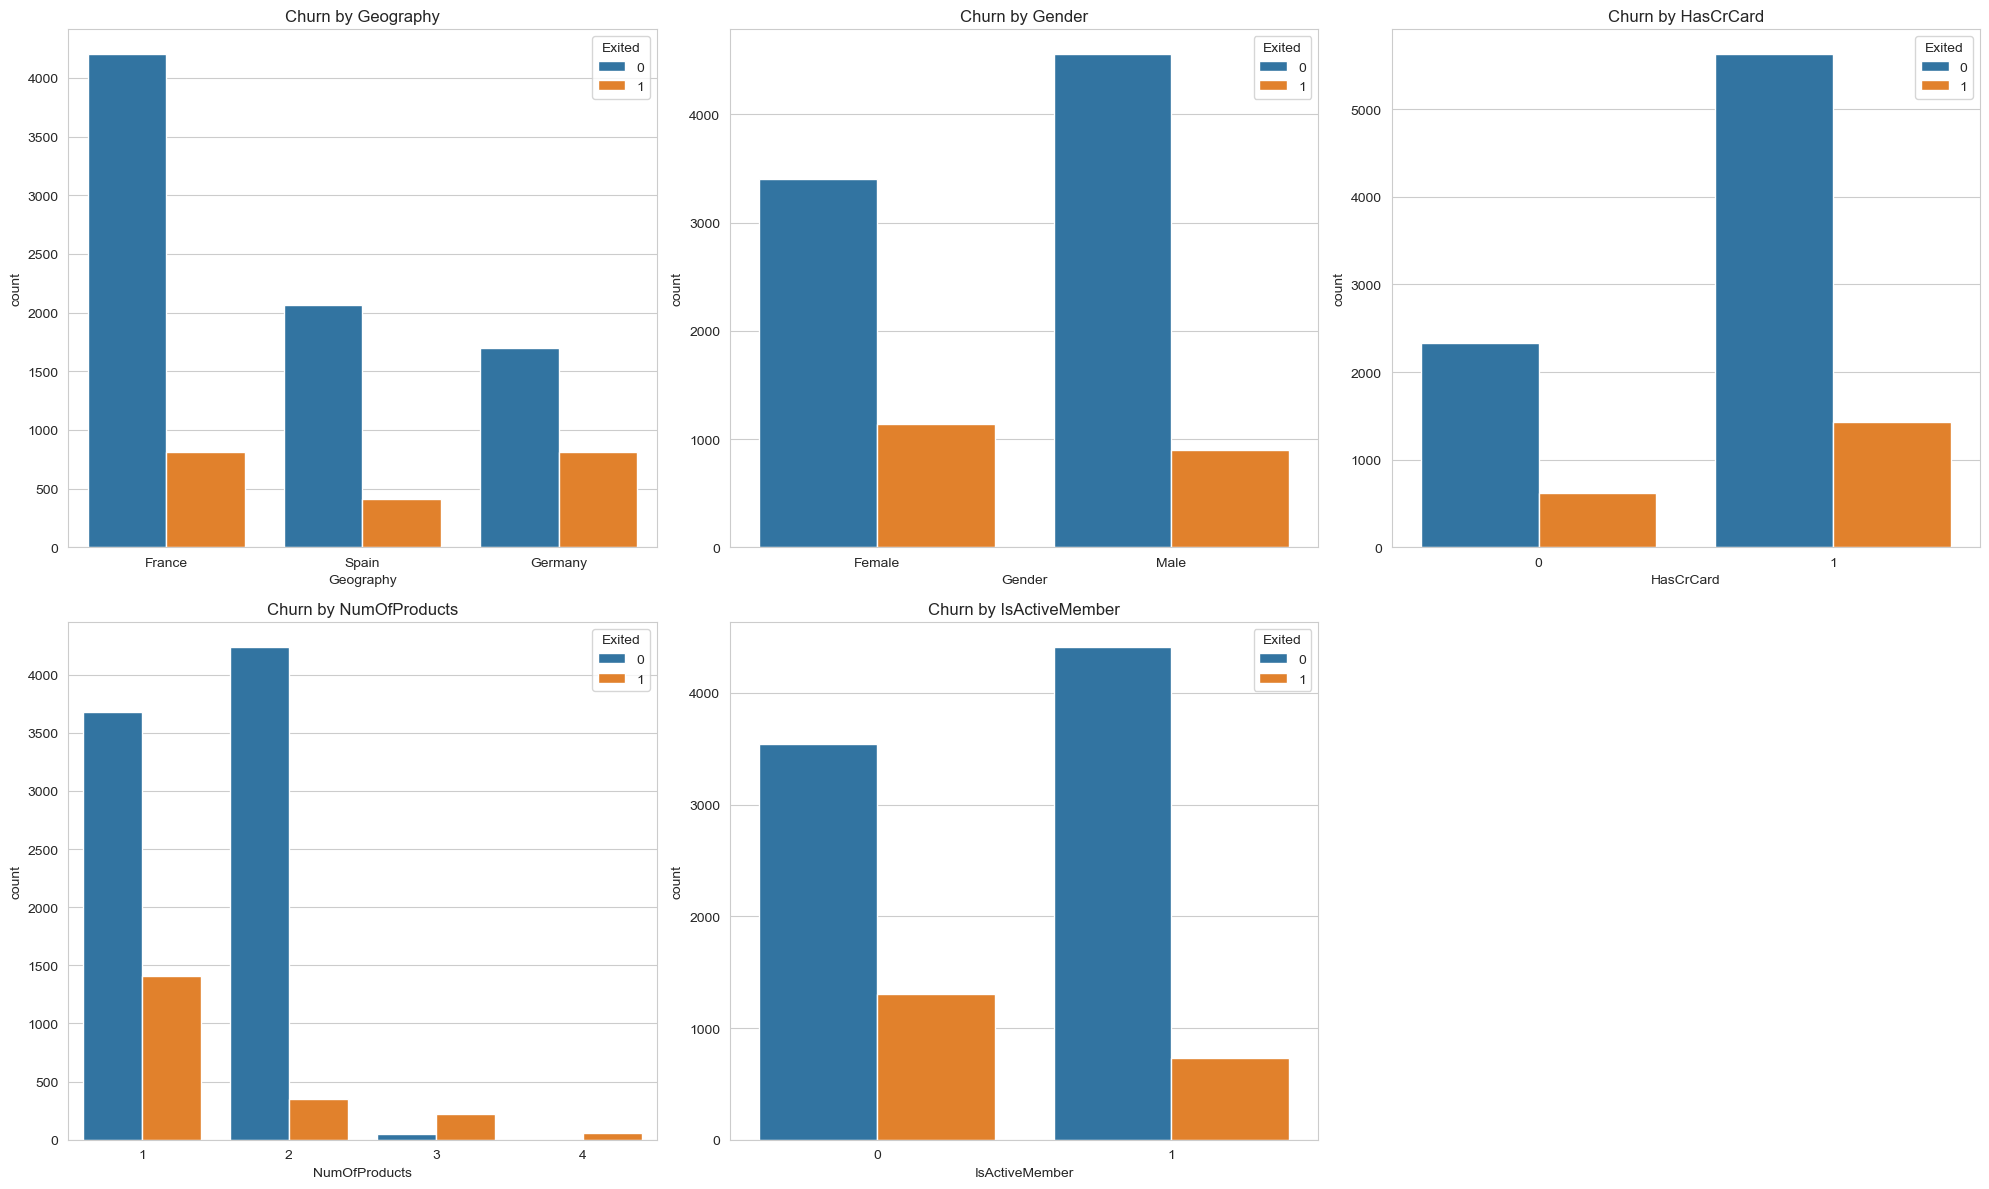

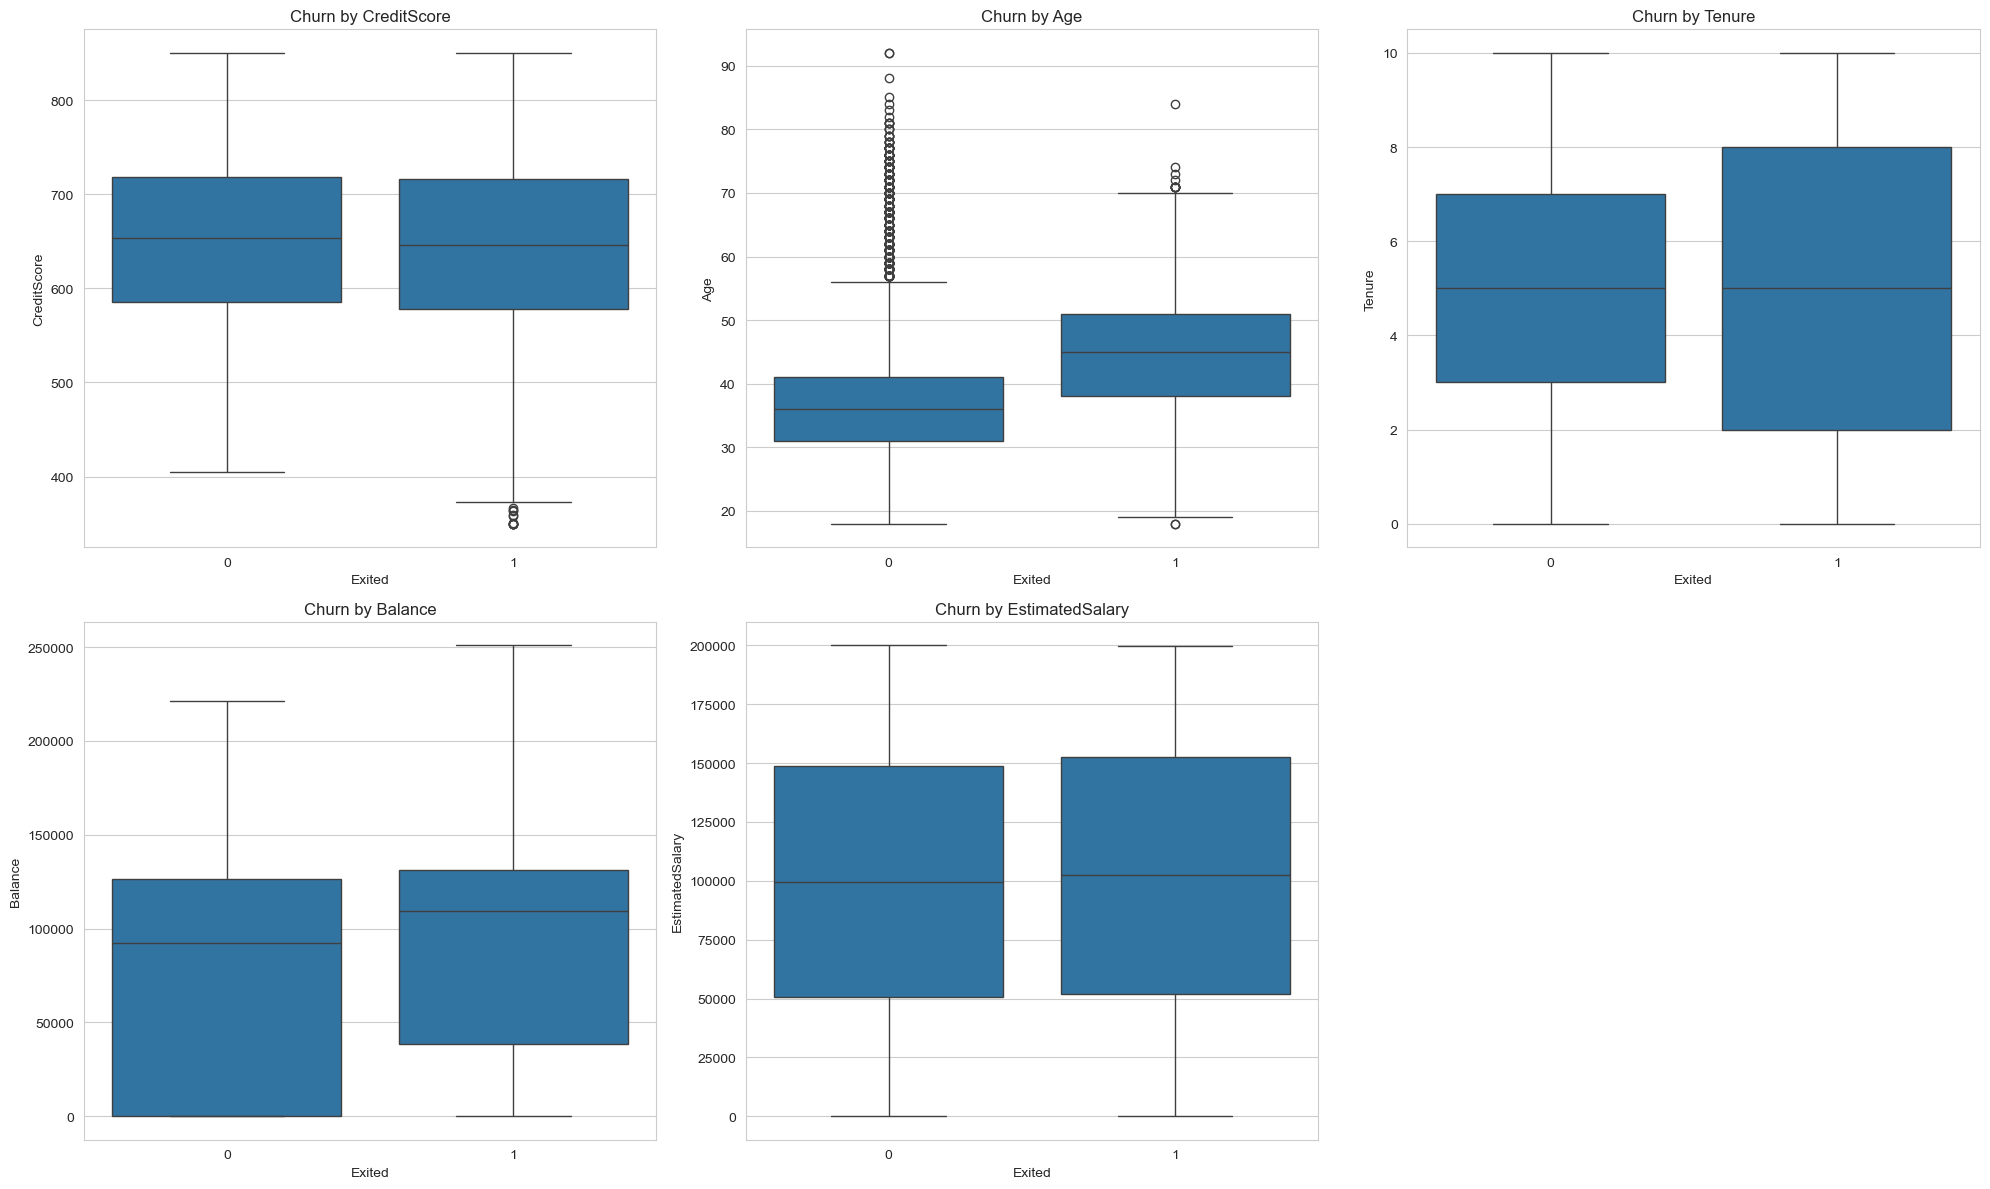


--- Correlation Matrix of Numerical Features ---


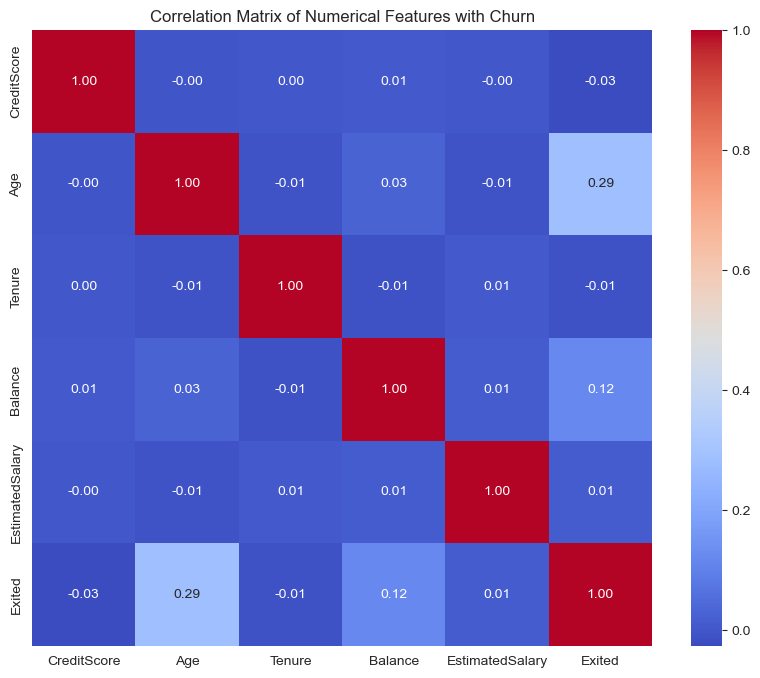

In [3]:
# Step 3: EDA & Visualisation

print("\n--- Exploratory Data Analysis ---")

# Drop columns that are not useful for prediction
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 1. Visualize the target variable 'Exited'
plt.figure()
sns.countplot(x='Exited', data=df_cleaned)
plt.title('Distribution of Customer Churn (Exited)')
plt.xlabel('0: Did Not Churn, 1: Churned')
plt.ylabel('Number of Customers')
plt.savefig('graphs/churn_distribution.png')
plt.show()

# 2. Visualize churn by categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Flatten the 2x2 grid to a 1D array
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Exited', data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
# Hide the last empty subplot
if len(categorical_features) < len(axes):
    axes[-1].set_visible(False)
plt.tight_layout()
plt.savefig('graphs/churn_by_categorical_features.png')
plt.show()

# 3. Visualize churn by numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x='Exited', y=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
# Hide the last empty subplot
if len(numerical_features) < len(axes):
    axes[-1].set_visible(False)
plt.tight_layout()
plt.savefig('graphs/churn_by_numerical_features.png')
plt.show()

print("\n--- Correlation Matrix of Numerical Features ---")

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_features + ['Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.savefig('graphs/correlation_matrix.png')
plt.show()


In [4]:
# Step 4: Data Preprocessing
# ---
print("\n--- Data Preprocessing ---")

# Define features (X) and target (y)
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# --- Manual Identification of Categorical and Numerical Features ---
# Identify categorical and numerical features for preprocessing
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create a preprocessing pipeline
# 1. For numerical data: scale the features
# 2. For categorical data: one-hot encode the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



--- Data Preprocessing ---
Training set shape: (8000, 10)
Testing set shape: (2000, 10)



--- Model Training & Baseline Comparison ---
--- Logistic Regression ---
Accuracy: 0.8400
ROC AUC Score: 0.8366
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.36      0.48       407

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000

Confusion Matrix:
[[1532   61]
 [ 259  148]]


--- Random Forest ---
Accuracy: 0.8590
ROC AUC Score: 0.8483
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1529   64]
 [ 218  189]]




/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:10:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.8540
ROC AUC Score: 0.8362
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
[[1512   81]
 [ 211  196]]




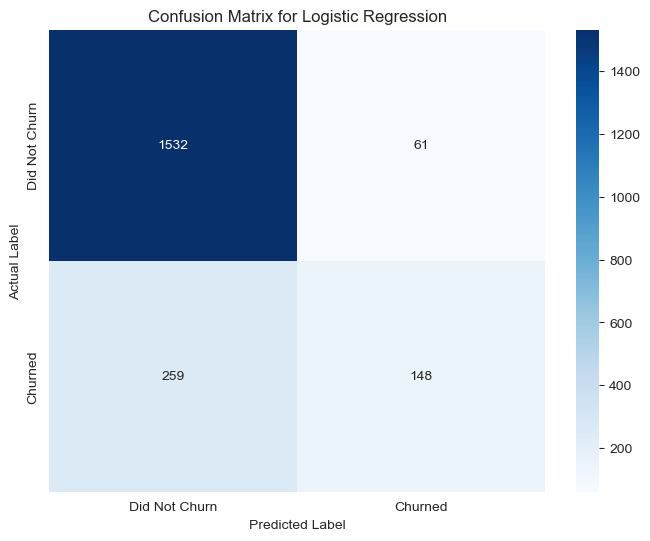

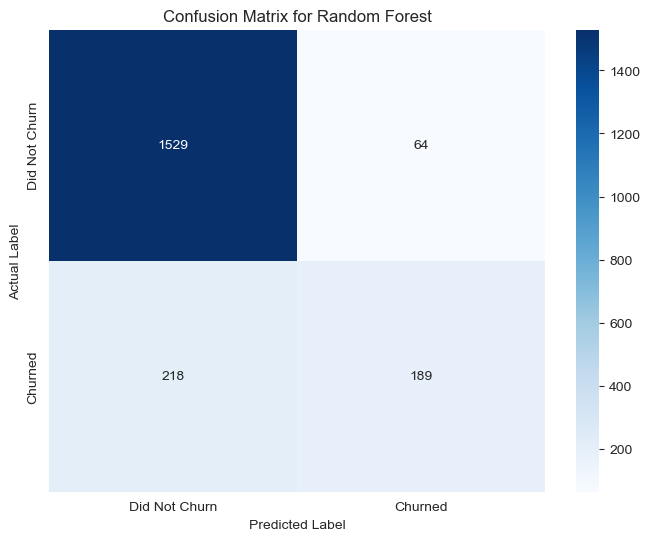

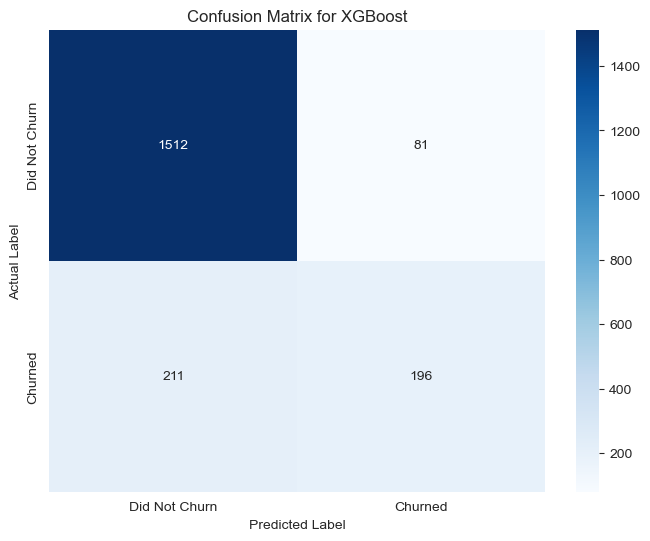

In [5]:
# Step 5: Model Training & Baseline Comparison
# ---
print("\n--- Model Training & Baseline Comparison ---")
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    # Create a full pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': pipeline,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': report,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm 
    }

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# --- New section to visualize and save confusion matrices ---
for name, res in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Did Not Churn', 'Churned'],
                yticklabels=['Did Not Churn', 'Churned'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'graphs/confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()


--- Feature Importance Analysis ---


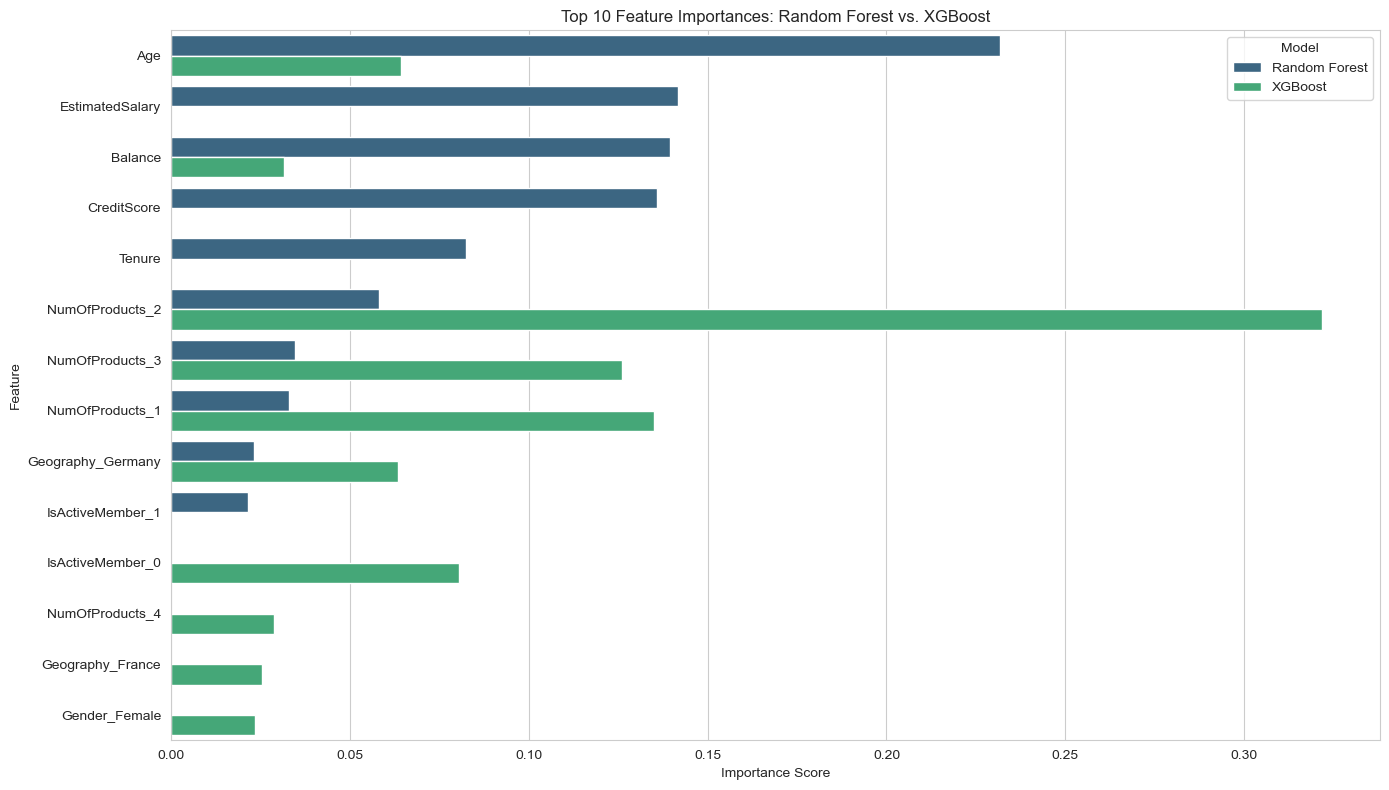

In [9]:
# Step 6: Feature Selection (using Random Forest Feature Importance)
# ---
print("\n--- Feature Importance Analysis ---")

# Get feature names from the preprocessor
preprocessor = results['Random Forest']['model'].named_steps['preprocessor']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Combine numerical and one-hot encoded categorical feature names
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features))
feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

importance_dfs = {}

# Random Forest Feature Importance
rf_importances = results['Random Forest']['model'].named_steps['classifier'].feature_importances_
importance_dfs['Random Forest'] = pd.DataFrame({'feature': feature_names, 'importance': rf_importances}).sort_values(by='importance', ascending=False)

# XGBoost Feature Importance
xgb_importances = results['XGBoost']['model'].named_steps['classifier'].feature_importances_
importance_dfs['XGBoost'] = pd.DataFrame({'feature': feature_names, 'importance': xgb_importances}).sort_values(by='importance', ascending=False)

# Create a combined DataFrame for plotting
df_rf = importance_dfs['Random Forest'].head(10).copy()
df_rf['model'] = 'Random Forest'

df_xgb = importance_dfs['XGBoost'].head(10).copy()
df_xgb['model'] = 'XGBoost'

combined_df = pd.concat([df_rf, df_xgb])

# Plotting the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='importance', y='feature', hue='model', data=combined_df, palette='viridis')
plt.title('Top 10 Feature Importances: Random Forest vs. XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('graphs/feature_importance_rf_vs_xgb.png')
plt.show()

In [10]:
# Step 7: Hyperparameter Tuning (for XGBoost)
# ---
print("\n--- Hyperparameter Tuning for XGBoost ---")

# Define models and their parameter grids
tuned_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.05, 0.1]
        }
    }
}

best_results = {}
for name, settings in tuned_models.items():
    print(f"\nStarting Grid Search for {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', settings['model'])])
    
    grid_search = GridSearchCV(pipeline, settings['param_grid'], cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC score for {name}: {grid_search.best_score_:.4f}")

    best_results[name] = grid_search.best_estimator_

    # Evaluate the tuned model on the test set
    y_pred_tuned = best_results[name].predict(X_test)
    y_pred_proba_tuned = best_results[name].predict_proba(X_test)[:, 1]

    results[f'Tuned {name}'] = {
        'model': best_results[name],
        'accuracy': accuracy_score(y_test, y_pred_tuned),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_tuned),
        'report': classification_report(y_test, y_pred_tuned),
        'y_pred_proba': y_pred_proba_tuned,
        'confusion_matrix': confusion_matrix(y_test, y_pred_tuned)
    }




--- Hyperparameter Tuning for XGBoost ---

Starting Grid Search for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Best ROC AUC score for Logistic Regression: 0.8313

Starting Grid Search for Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Best ROC AUC score for Random Forest: 0.8627

Starting Grid Search for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best parameters for XGBoost: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best ROC AUC score for XGBoost: 0.8652


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Model Comparison (Tuned) ---
Final Model Performance (ROC AUC):
                       Model  ROC_AUC_Score
5              Tuned XGBoost       0.868352
4        Tuned Random Forest       0.858870
1              Random Forest       0.848286
0        Logistic Regression       0.836576
3  Tuned Logistic Regression       0.836567
2                    XGBoost       0.836231


/var/folders/0r/rzm5lkxs6r763lxm3q26yh7h0000gn/T/ipykernel_26016/2843151940.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC_AUC_Score', y='Model', data=roc_df, palette='viridis')


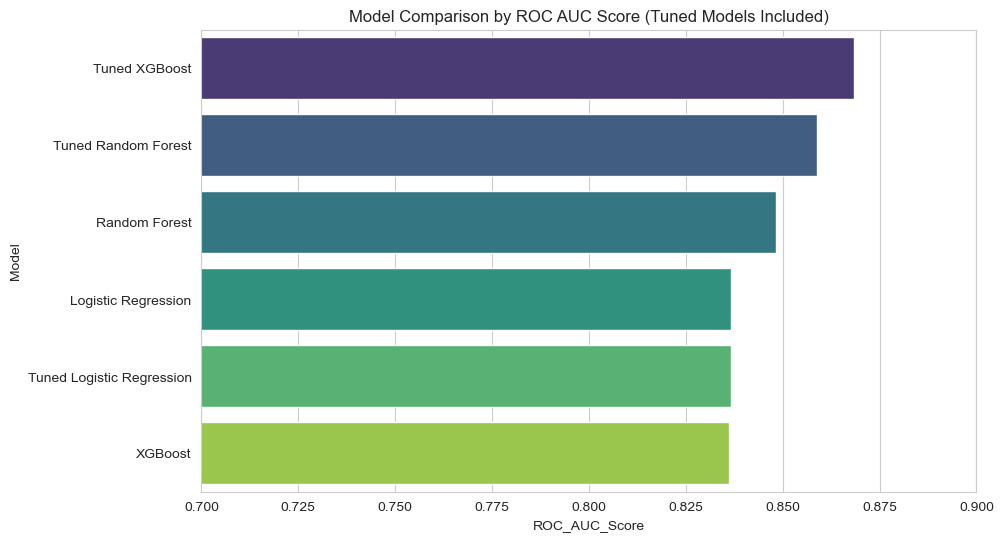

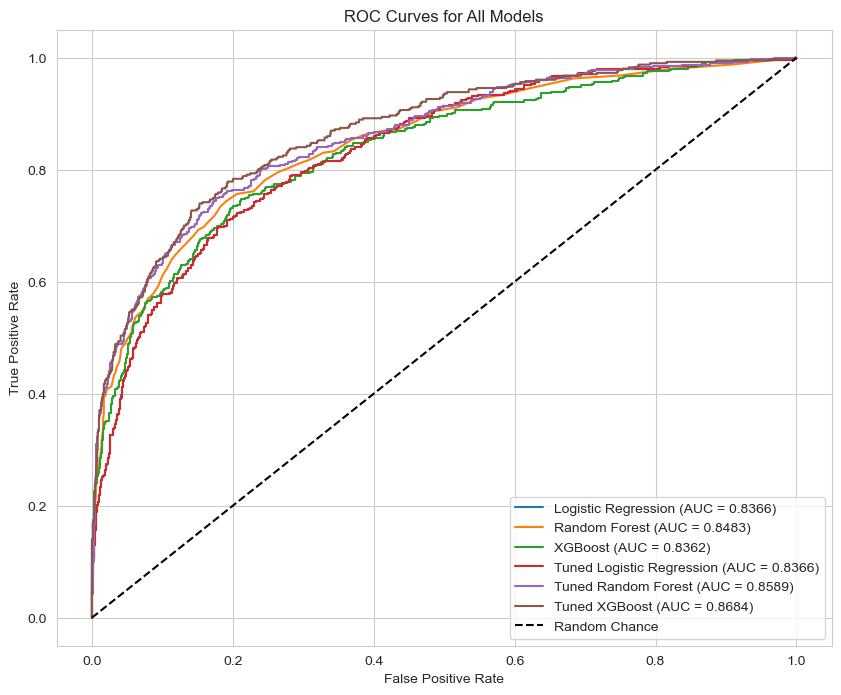

In [11]:
# Step 8: Final Model Comparison (Updated to include tuned models)
print("\n--- Final Model Comparison (Tuned) ---")

roc_auc_scores = {name: res['roc_auc'] for name, res in results.items()}
roc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC_AUC_Score']).sort_values(by='ROC_AUC_Score', ascending=False)

print("Final Model Performance (ROC AUC):")
print(roc_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='ROC_AUC_Score', y='Model', data=roc_df, palette='viridis')
plt.title('Model Comparison by ROC AUC Score (Tuned Models Included)')
plt.xlim(0.7, 0.9)
plt.savefig('graphs/final_model_comparison_roc_auc.png')
plt.show()

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.savefig('graphs/roc_curves_all_models.png')
plt.show()
